# Part II - Presentation of Exploratory Data Analysis of the Ford GoBike System Data
## by Heba Daraghmeh

### Table of Contect

<ul>
    <li><a href='#inv'> Investigation Overview </a></li>
    <li><a href='#inv2'> Dataset Overview and Executive Summary </a></li>
    <li><a href='#du'> Exploring Duration Ranges of Trips </a></li>
    <li><a href='#aff'> Exploring The Affect of The Start Station Latitude on The Trip Duration </a></li>
    <li><a href='#count'> Exploring Counts and Types of Users Sharing their bikes for all the Trip </a></li>
</ul>

<a id='inv'></a>
## Investigation Overview


> The goal of this presentation is to explore and analyze the 'Ford GoBike System Data' dataset to uncover key insights about bike-sharing patterns and usage in the San Francisco Bay area. This analysis aims to provide a comprehensive understanding of various factors influencing bike usage, including user demographics, trip characteristics, and the impact of bike-sharing programs.

<a id='inv2'></a>
## Dataset Overview and Executive Summary

> Dataset Introduction
The dataset used for this analysis is the 'Ford GoBike System Data,' which provides detailed information about individual rides within a bike-sharing system in the greater San Francisco Bay area. This dataset includes various features related to each ride, such as:

> * Duration of the ride (in seconds)
> * Start and end times
> * Start and end station details (ID, name, latitude, longitude)
> * Bike ID
> * User type (e.g., Subscriber, Customer)
> * Member birth year and gender
> * Bike share for all trip (whether the trip is part of a program aimed at providing bikes to everyone)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

<a id='du'></a>
## Duration Ranges of Trips

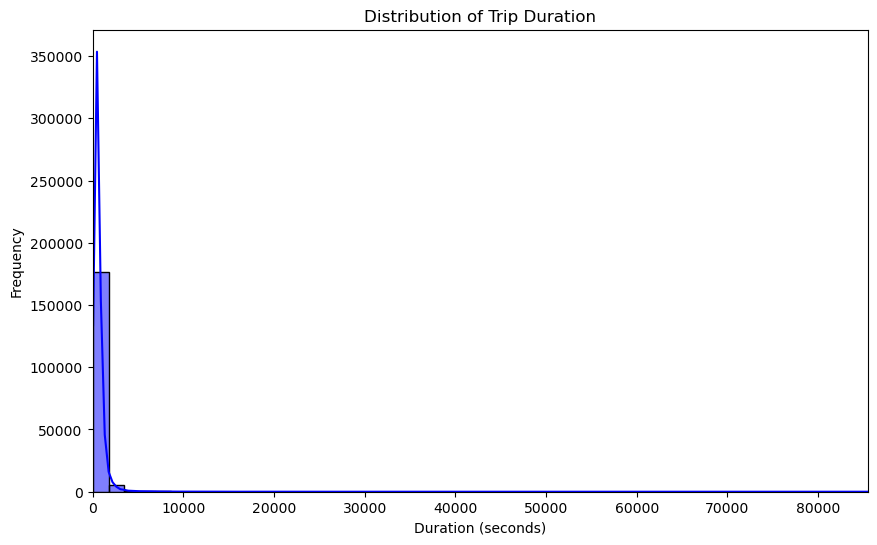

In [3]:
# Plot histogram of trip duration
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_sec'], bins=50, kde=True, color='blue')
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.xlim(0, df['duration_sec'].max())
plt.show()

The histogram of the duration of the trips is extremely skewed towards shorter trip durations, with almost all trips having very short durations. This lack of variation could indicate that long trips are rarely made so they are little.

<a id='aff'></a>
## The Affect of The Start Station Latitude on The Trip Duration

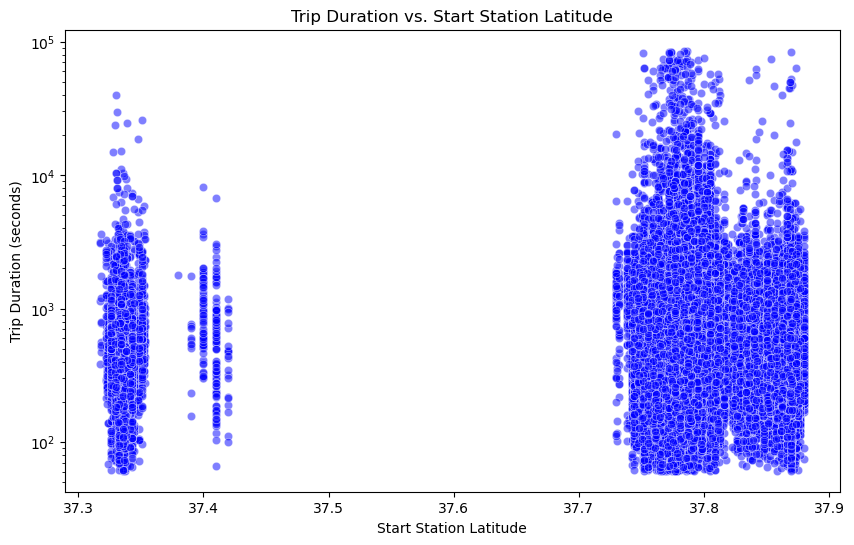

In [4]:
# Plot scatter plot of trip duration vs. start station latitude 
# and use log scale for better visualization of wide range of trip durations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='start_station_latitude', y='duration_sec', data=df, alpha=0.5, color='blue')
plt.title('Trip Duration vs. Start Station Latitude')
plt.xlabel('Start Station Latitude')
plt.ylabel('Trip Duration (seconds)')
plt.yscale('log')  
plt.show()

At certain latitudes, there is a wide range of trip durations. This could be due to popular start stations located at these latitudes.

<a id='count'></a>
## Counts and Types of Users Sharing their bikes for all the Trip

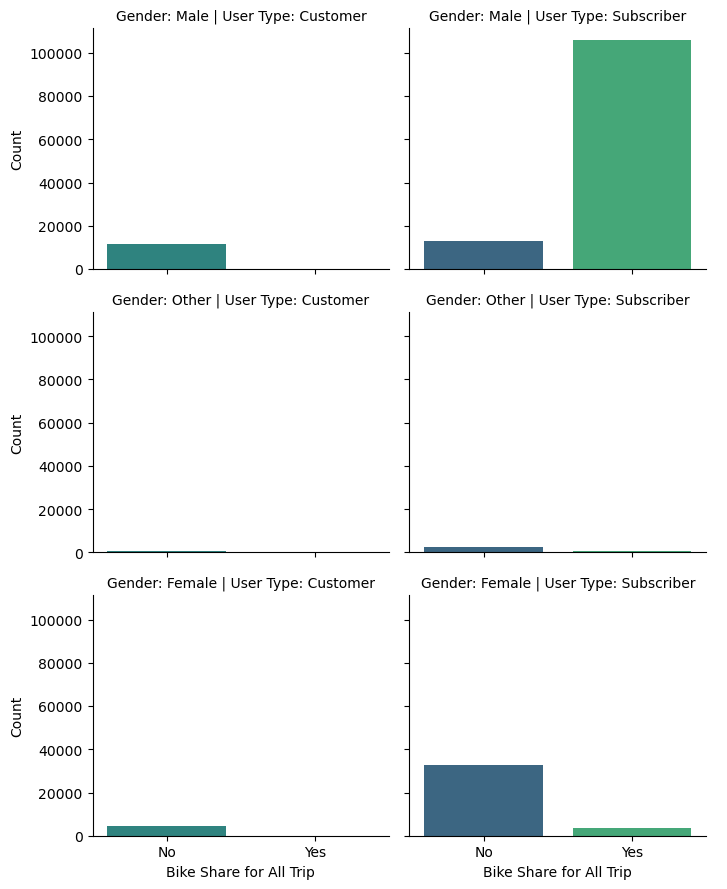

In [5]:
# Explore the distribution of bike_share_for_all_trip with respect to user_type and member_gender.
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(
    data=df, 
    col='user_type', 
    row='member_gender', 
    height=3,
    aspect=1.2
)
g.map_dataframe(sns.countplot, x='bike_share_for_all_trip', palette='viridis')
g.add_legend()
g.set_axis_labels('Bike Share for All Trip', 'Count')
g.set_titles(col_template='User Type: {col_name}', row_template='Gender: {row_name}')
plt.show()


- No customer had shared a bike for all the trip at all.
- Most subscriber femails are not sharing there bikes, while most mails are sharing there rides.